<h1>Life Expectancy Prediction </h1><br>
The dataset used in the following machine learning algorithm is provided by WHO. <br>Life Expectancy refers to the average time an organism is expected to live, based on the year of its birth, its current age, and other demographic factors.

<h3>Importing Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(20,20)})

<h3>Importing Dataset</h3>

In [2]:
data = pd.read_csv("Life Expectancy Data.csv")
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

<h3>Getting Information about the dataset</h3>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<h6>As it is evident from the above informatics that we have null values for various columns.<br>Hence dropping the rows for the null values.</h6>

In [4]:
data.dropna(axis=0,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

<h3>Getting Feature Discription and Visualisation of Data</h3>

In [5]:
data.describe(include="all")

Country         Year      Status  Life expectancy   \
count          1649  1649.000000        1649       1649.000000   
unique          133          NaN           2               NaN   
top     Afghanistan          NaN  Developing               NaN   
freq             16          NaN        1407               NaN   
mean            NaN  2007.840509         NaN         69.302304   
std             NaN     4.087711         NaN          8.796834   
min             NaN  2000.000000         NaN         44.000000   
25%             NaN  2005.000000         NaN         64.400000   
50%             NaN  2008.000000         NaN         71.700000   
75%             NaN  2011.000000         NaN         75.000000   
max             NaN  2015.000000         NaN         89.000000   

        Adult Mortality  infant deaths      Alcohol  percentage expenditure  \
count       1649.000000    1649.000000  1649.000000             1649.000000   
unique              NaN            NaN          NaN                     NaN   
top                 NaN            NaN          NaN                     NaN   
freq                NaN            NaN          NaN                     NaN   
mean         168.215282      32.553062     4.533196              698.973558   
std          125.310417     120.847190     4.029189             1759.229336   
min            1.000000       0.000000     0.010000                0.000000   
25%           77.000000       1.000000     0.810000               37.438577   
50%          148.000000       3.000000     3.790000              145.102253   
75%          227.000000      22.000000     7.340000              509.389994   
max          723.000000    1600.000000    17.870000            18961.348600   

        Hepatitis B       Measles   ...        Polio  Total expenditure  \
count   1649.000000    1649.000000  ...  1649.000000        1649.000000   
unique          NaN            NaN  ...          NaN                NaN   
top             NaN            NaN  ...          NaN                NaN   
freq            NaN            NaN  ...          NaN                NaN   
mean      79.217708    2224.494239  ...    83.564585           5.955925   
std       25.604664   10085.802019  ...    22.450557           2.299385   
min        2.000000       0.000000  ...     3.000000           0.740000   
25%       74.000000       0.000000  ...    81.000000           4.410000   
50%       89.000000      15.000000  ...    93.000000           5.840000   
75%       96.000000     373.000000  ...    97.000000           7.470000   
max       99.000000  131441.000000  ...    99.000000          14.390000   

        Diphtheria      HIV/AIDS            GDP    Population  \
count   1649.000000  1649.000000    1649.000000  1.649000e+03   
unique          NaN          NaN            NaN           NaN   
top             NaN          NaN            NaN           NaN   
freq            NaN          NaN            NaN           NaN   
mean      84.155246     1.983869    5566.031887  1.465363e+07   
std       21.579193     6.032360   11475.900117  7.046039e+07   
min        2.000000     0.100000       1.681350  3.400000e+01   
25%       82.000000     0.100000     462.149650  1.918970e+05   
50%       92.000000     0.100000    1592.572182  1.419631e+06   
75%       97.000000     0.700000    4718.512910  7.658972e+06   
max       99.000000    50.600000  119172.741800  1.293859e+09   

         thinness  1-19 years   thinness 5-9 years  \
count             1649.000000          1649.000000   
unique                    NaN                  NaN   
top                       NaN                  NaN   
freq                      NaN                  NaN   
mean                 4.850637             4.907762   
std                  4.599228             4.653757   
min                  0.100000             0.100000   
25%                  1.600000             1.700000   
50%                  3.000000             3.200000   
75%                  7.100000             7.1000

<h6>Plotting the characteristics between Status of countries and the average life expectancy.</h6>

<AxesSubplot:xlabel='Status', ylabel='Life expectancy '>

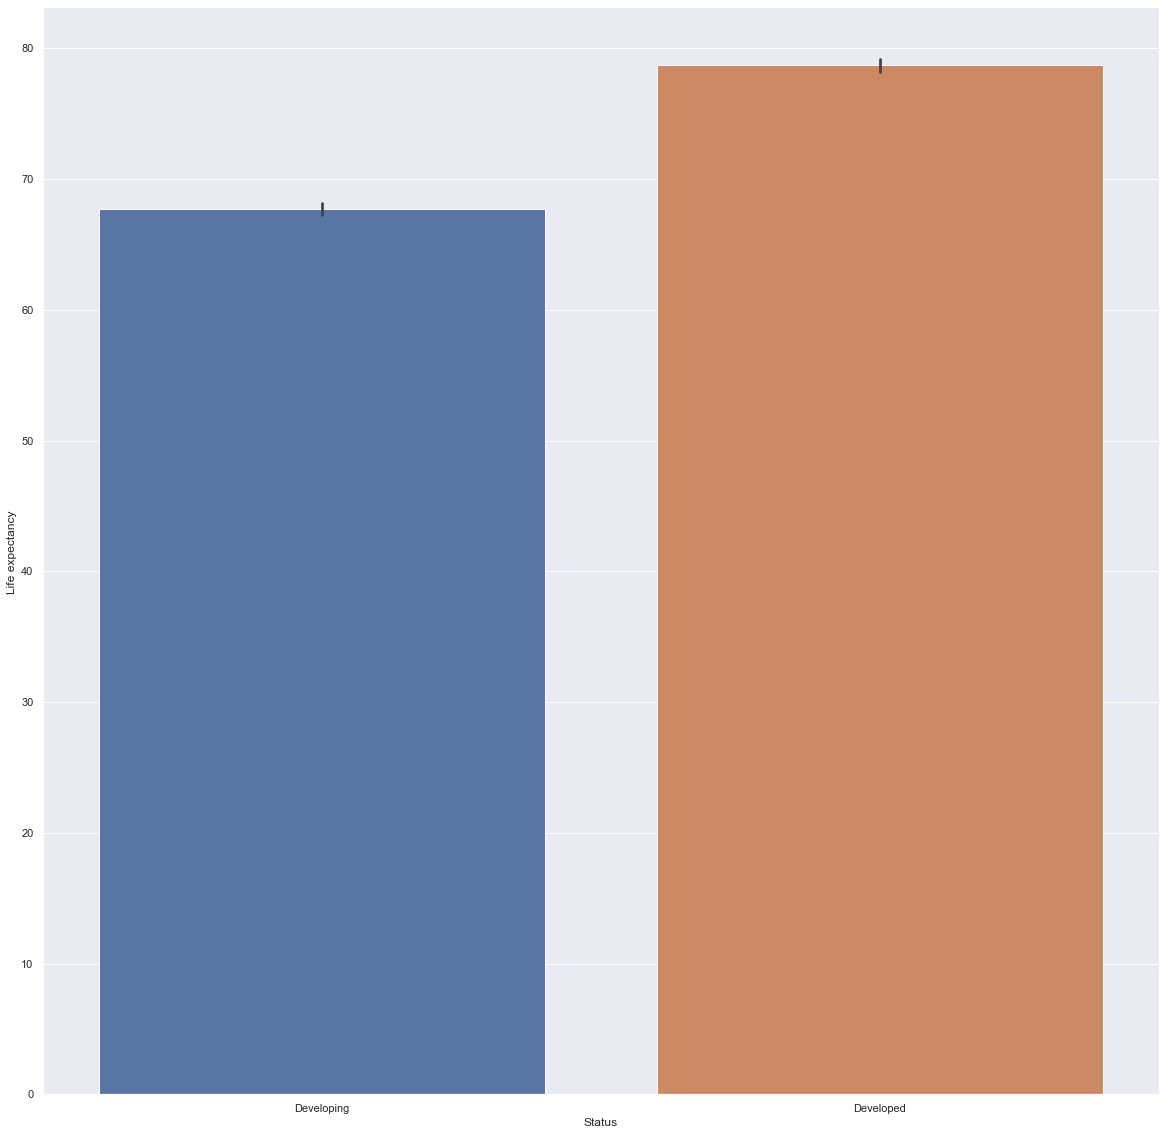

In [6]:
sns.barplot(data["Status"],data["Life expectancy "])

In [7]:
data["Status"].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

<h6>Plotting the characteristics between GDP and Life Expectancy</h6>

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy '>

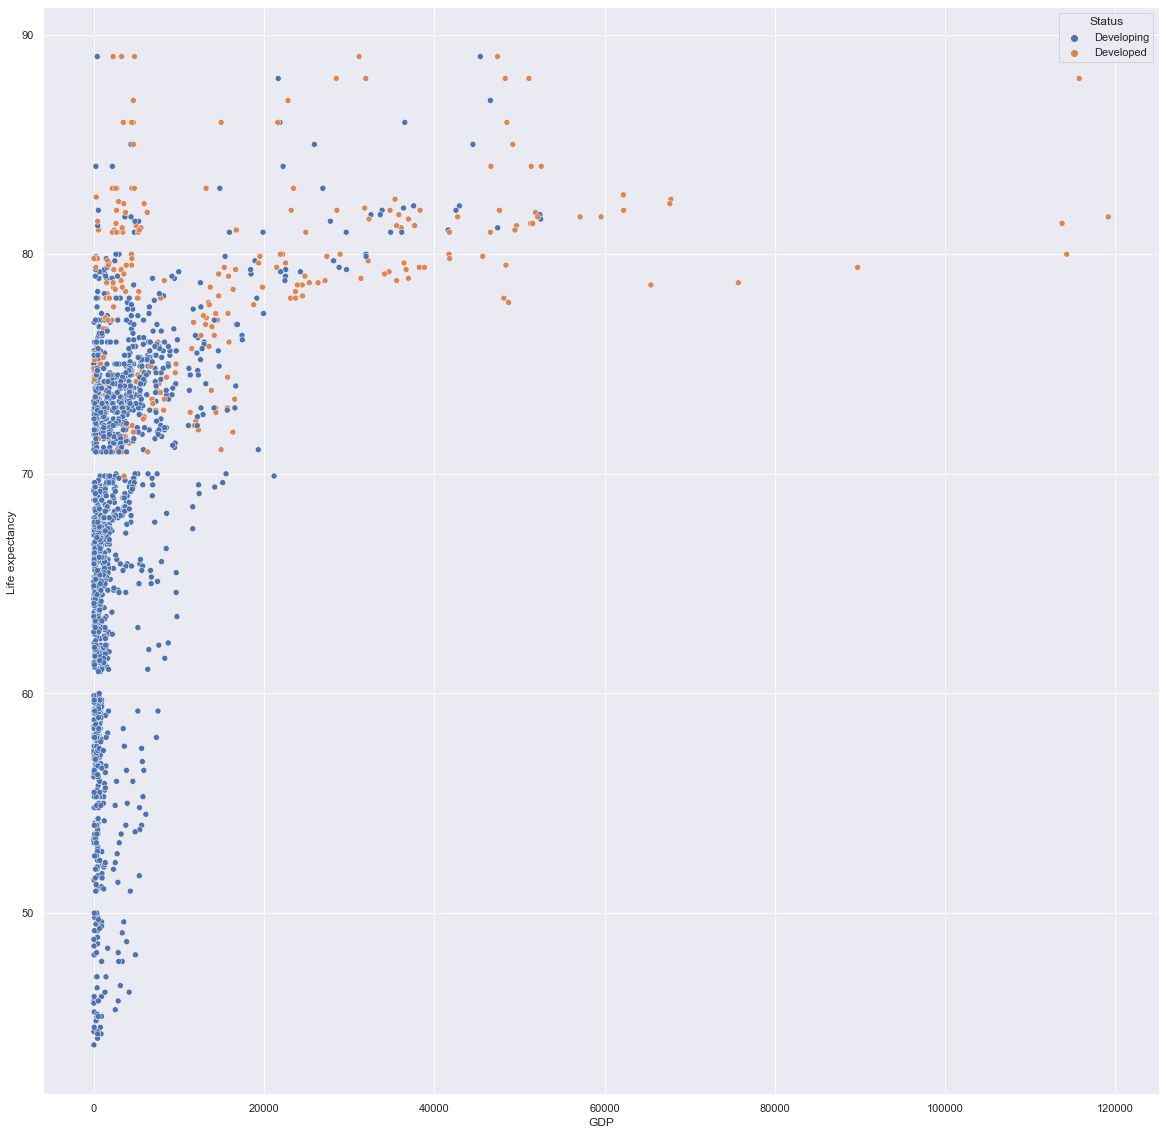

In [8]:
sns.scatterplot(data["GDP"],data["Life expectancy "],hue=data["Status"])

<h6>Plotting the characteristics between BMI and Life Expectancy</h6>

<AxesSubplot:xlabel=' BMI ', ylabel='Life expectancy '>

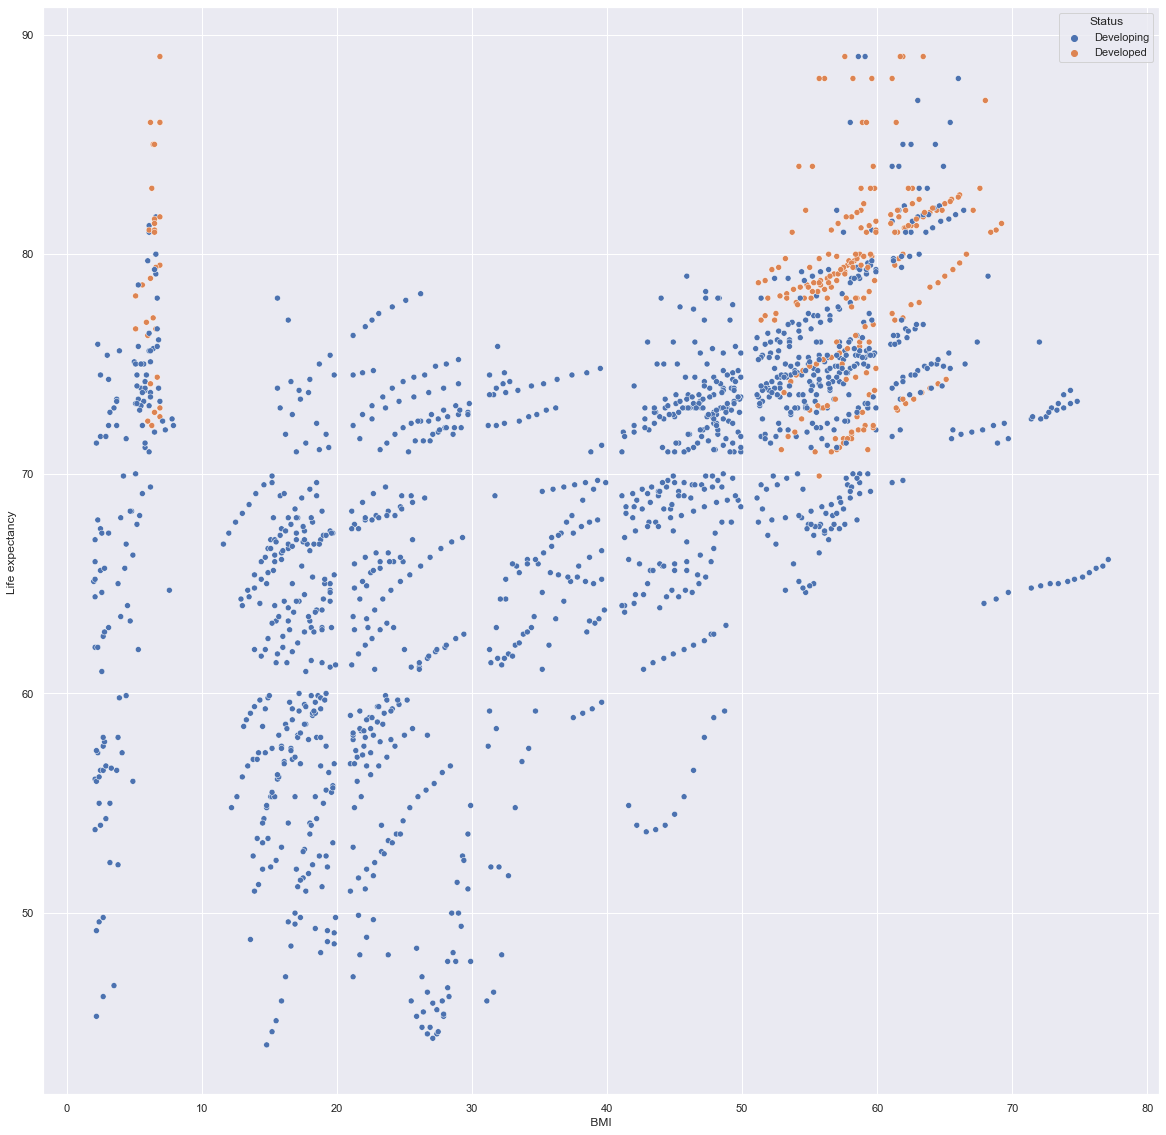

In [9]:
sns.scatterplot(data[" BMI "],data["Life expectancy "],hue=data["Status"])

<h6>Plotting the characteristics between Adult Mortality and Life Expectancy</h6>

<AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy '>

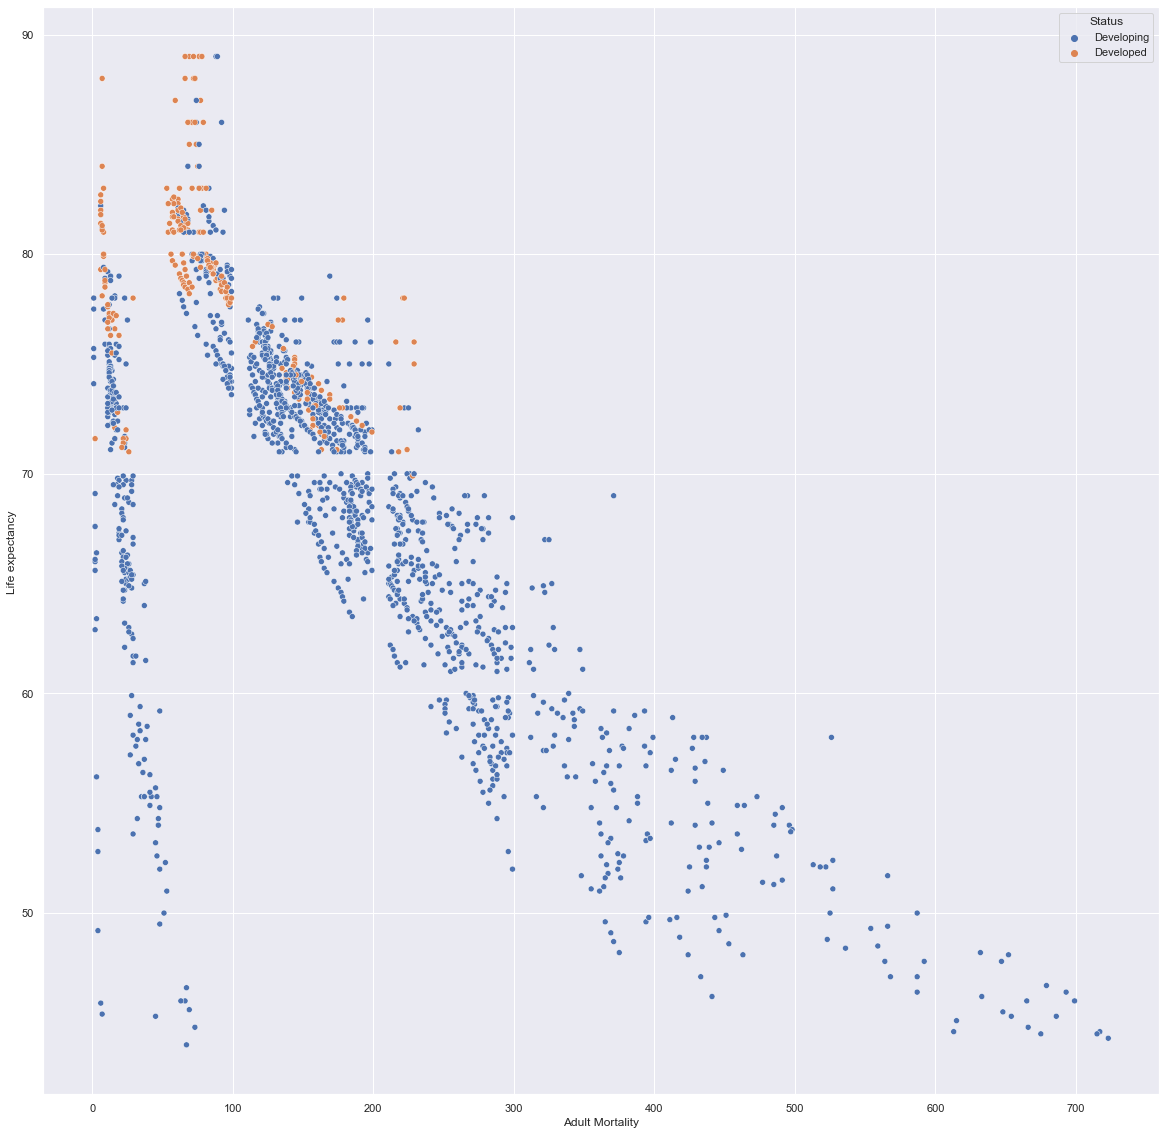

In [10]:
sns.scatterplot(data["Adult Mortality"],data["Life expectancy "],hue=data["Status"])

<h3>Plotting Pair-plot</h3>

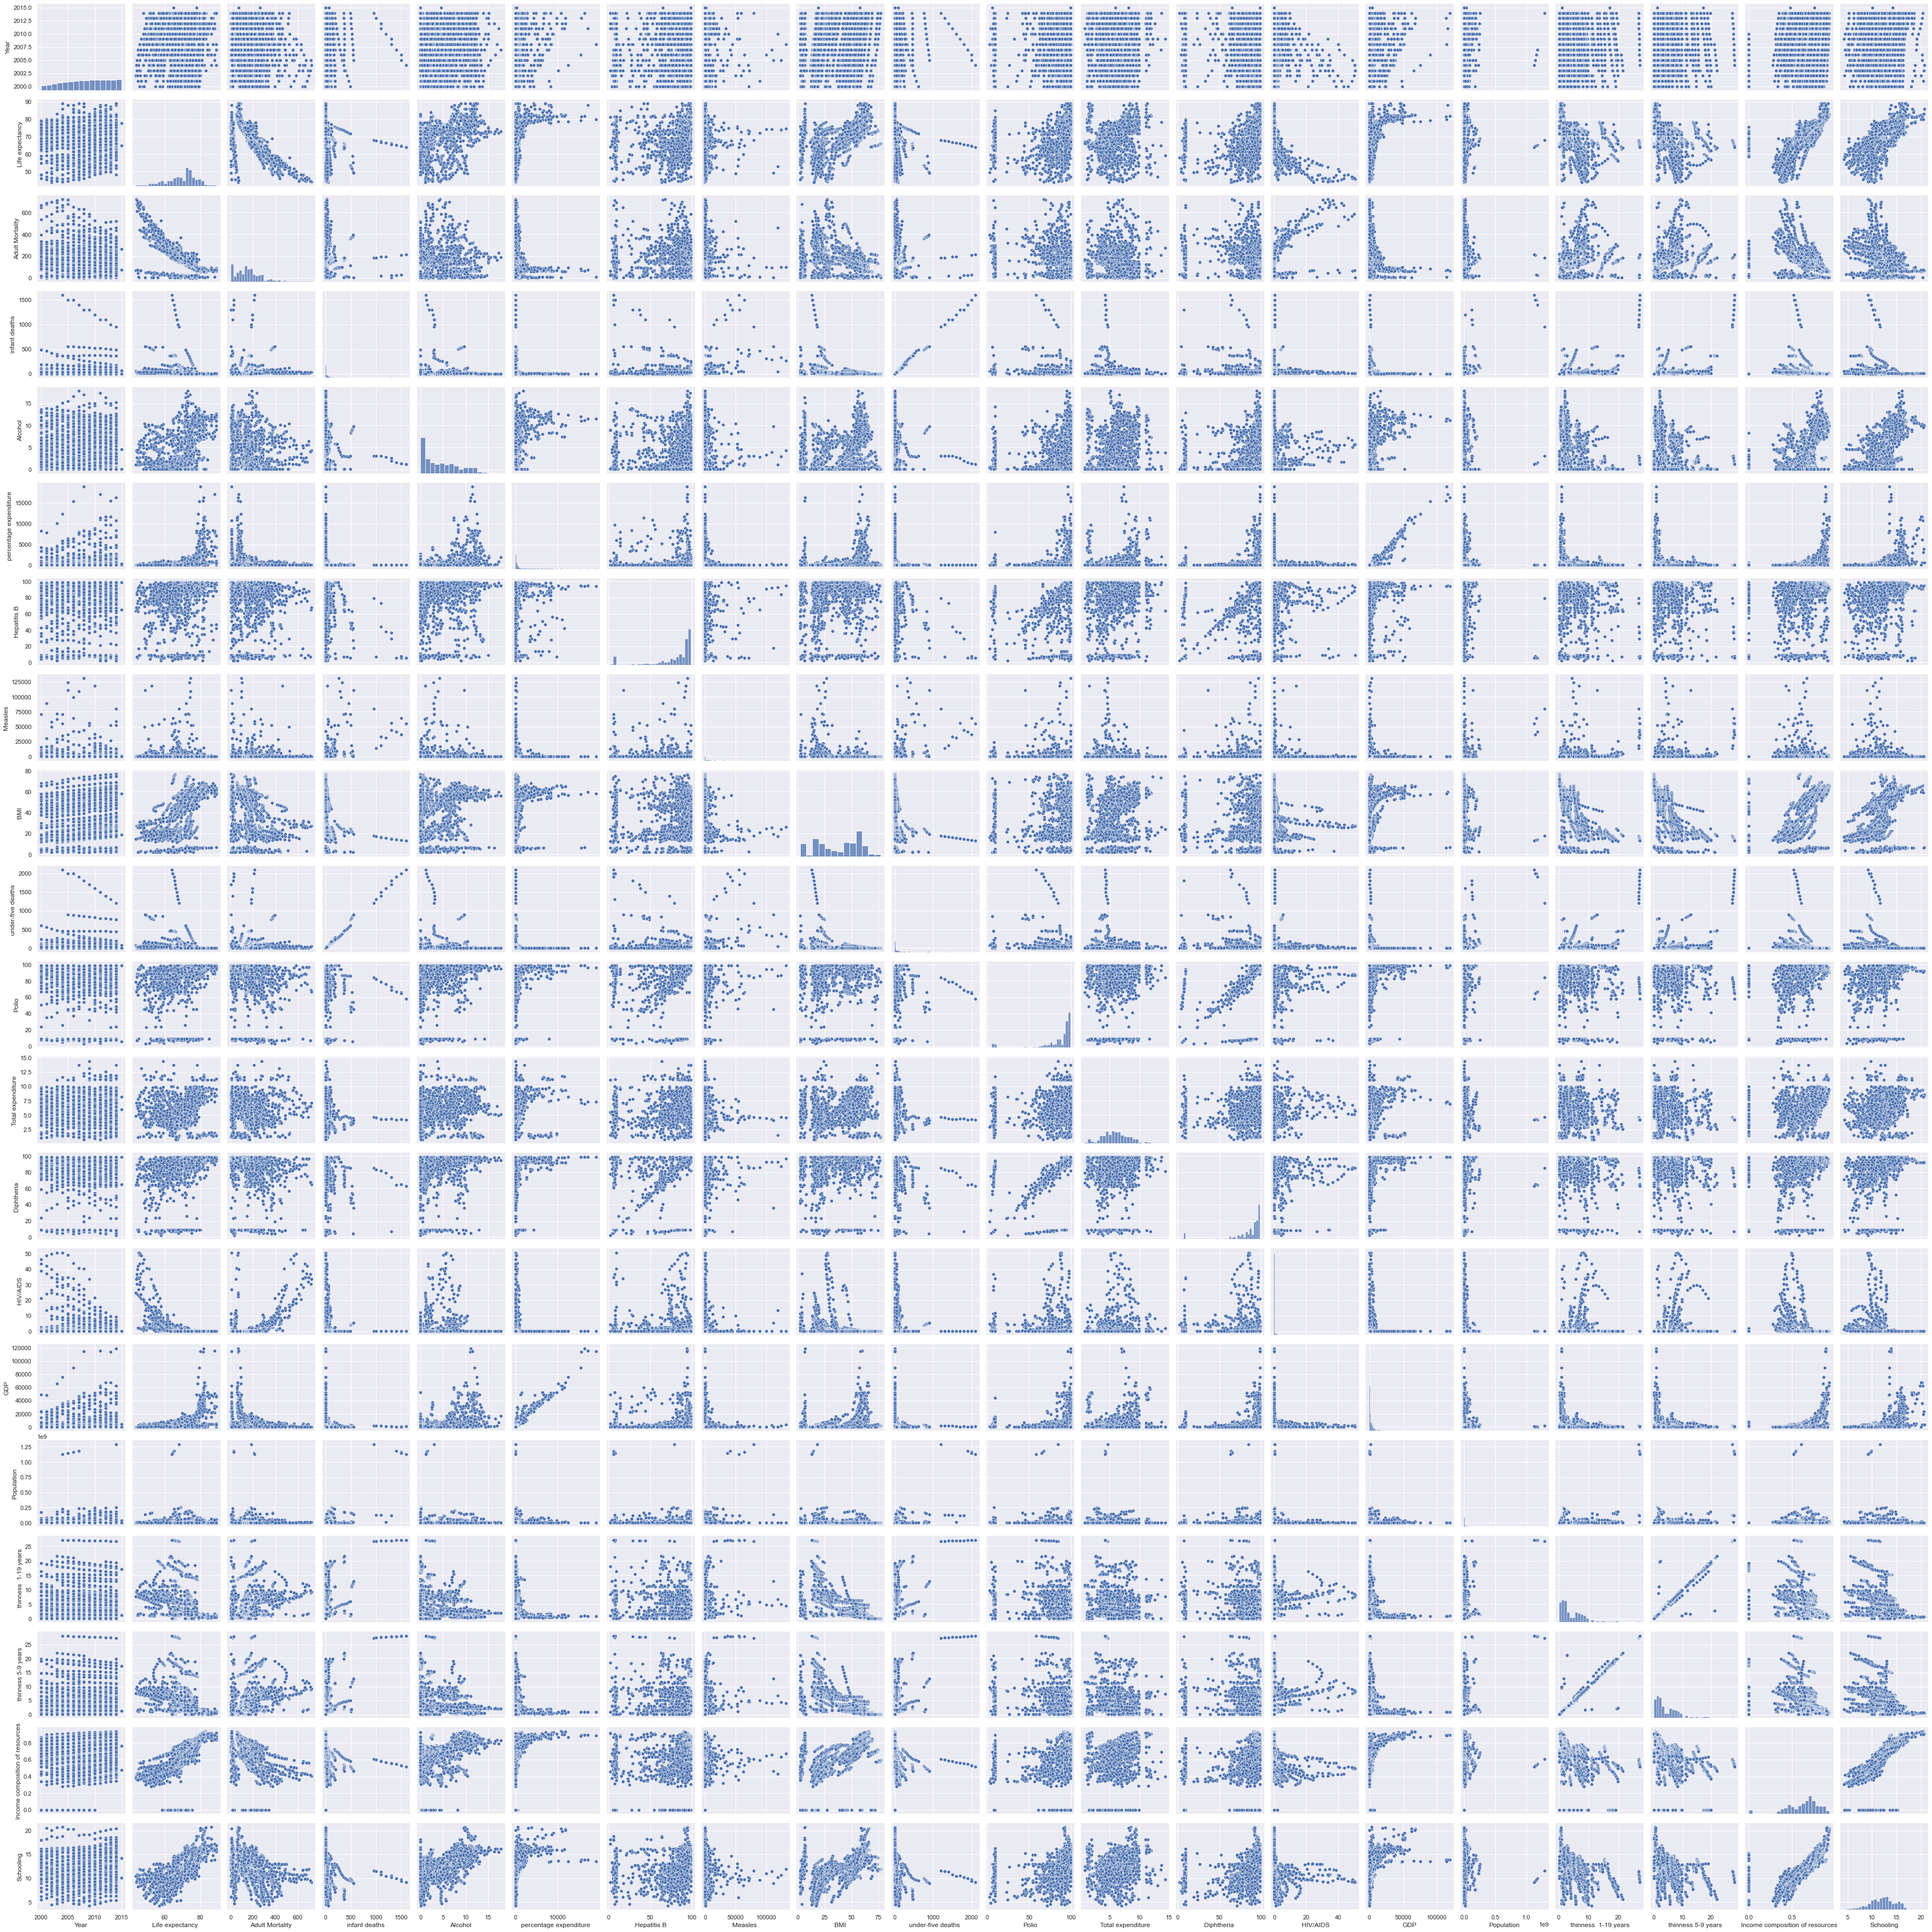

In [11]:
sns.pairplot(data)

<h3>Checking Correlation and Plotting heatmap</h3>

<AxesSubplot:>

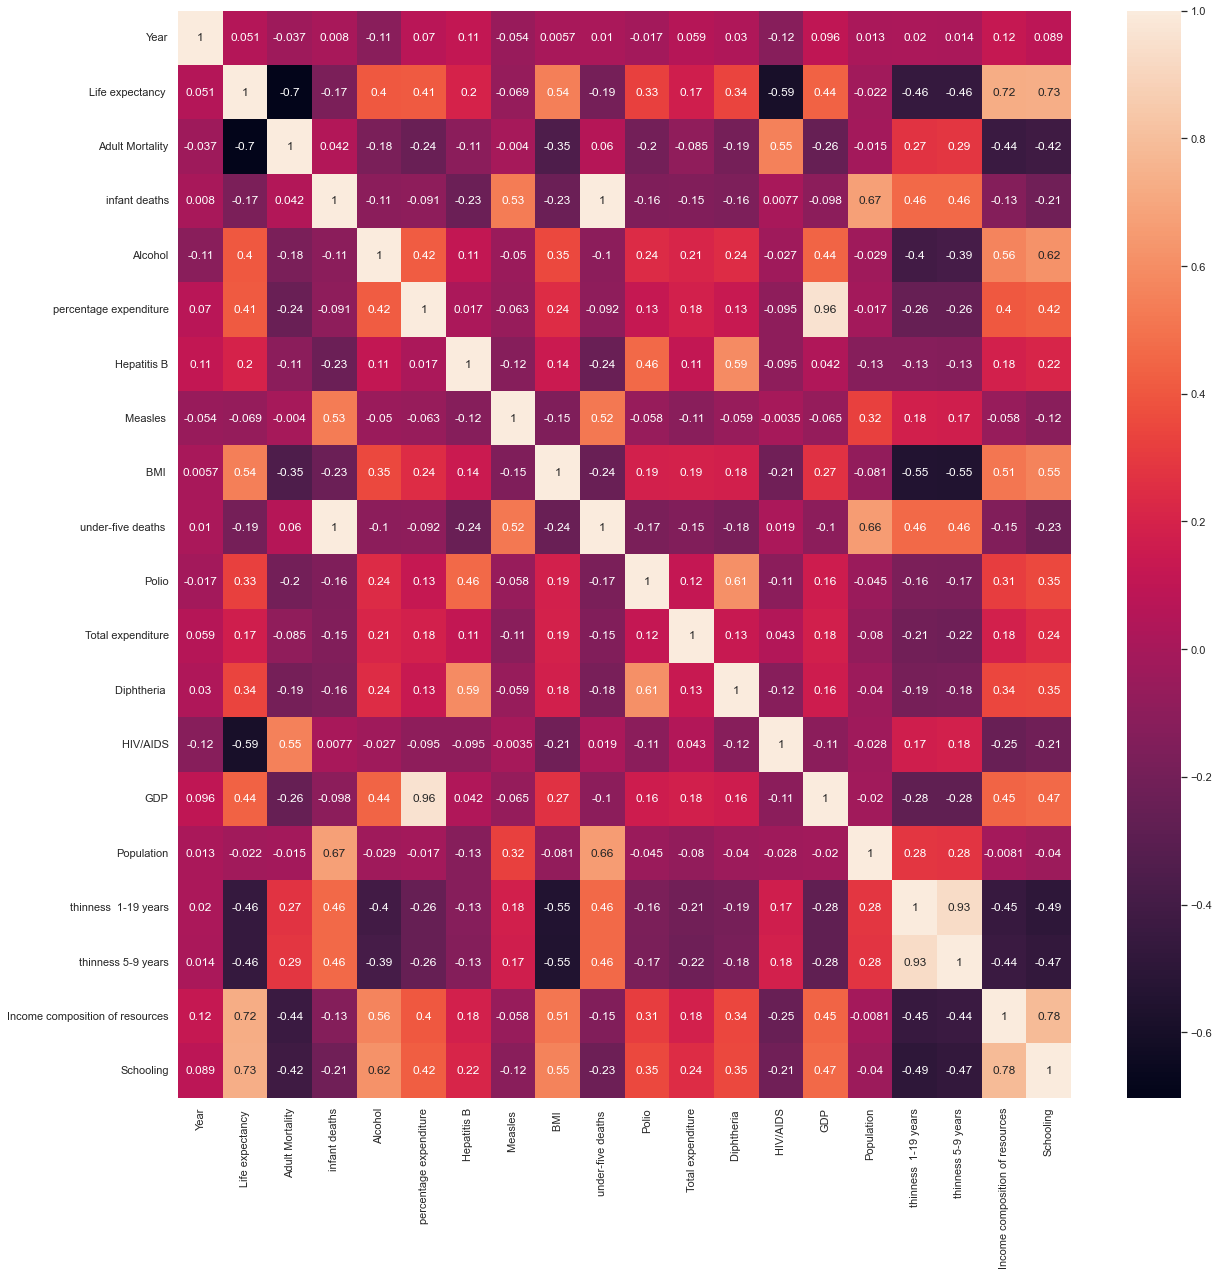

In [12]:
cor = data.corr()
sns.heatmap(cor,annot = True)

<h3>Selection of features</h3>

In [25]:
x = data[[" BMI ","Adult Mortality","Income composition of resources"," HIV/AIDS"]]
y = data["Life expectancy "]

<h3>Standarisation of Numerical Points</h3>

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x.values), 
                          columns=x.columns, index=x.index)
x.head()

BMI   Adult Mortality  Income composition of resources   HIV/AIDS
0  0.227696         0.362881                         0.511752        0.0
1  0.221039         0.373961                         0.508547        0.0
2  0.214381         0.369806                         0.502137        0.0
3  0.207723         0.375346                         0.494658        0.0
4  0.202397         0.379501                         0.485043        0.0

<h3>Train Test Split</h3>

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

<h3>Multiple Linear Regression</h3>

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

<h3>Checking Model Performance</h3>

In [29]:
model.score(x_train, y_train)

0.7788079531310127

In [30]:
model.score(x_test, y_test)

0.7776042271179255

In [31]:
model.coef_

array([  5.27562634, -14.84168894,  20.13034627, -21.08235481])

In [32]:
model.intercept_

57.33515927955132

<h3>Regression Plots</h3>

<AxesSubplot:xlabel=' BMI ', ylabel='Life expectancy '>

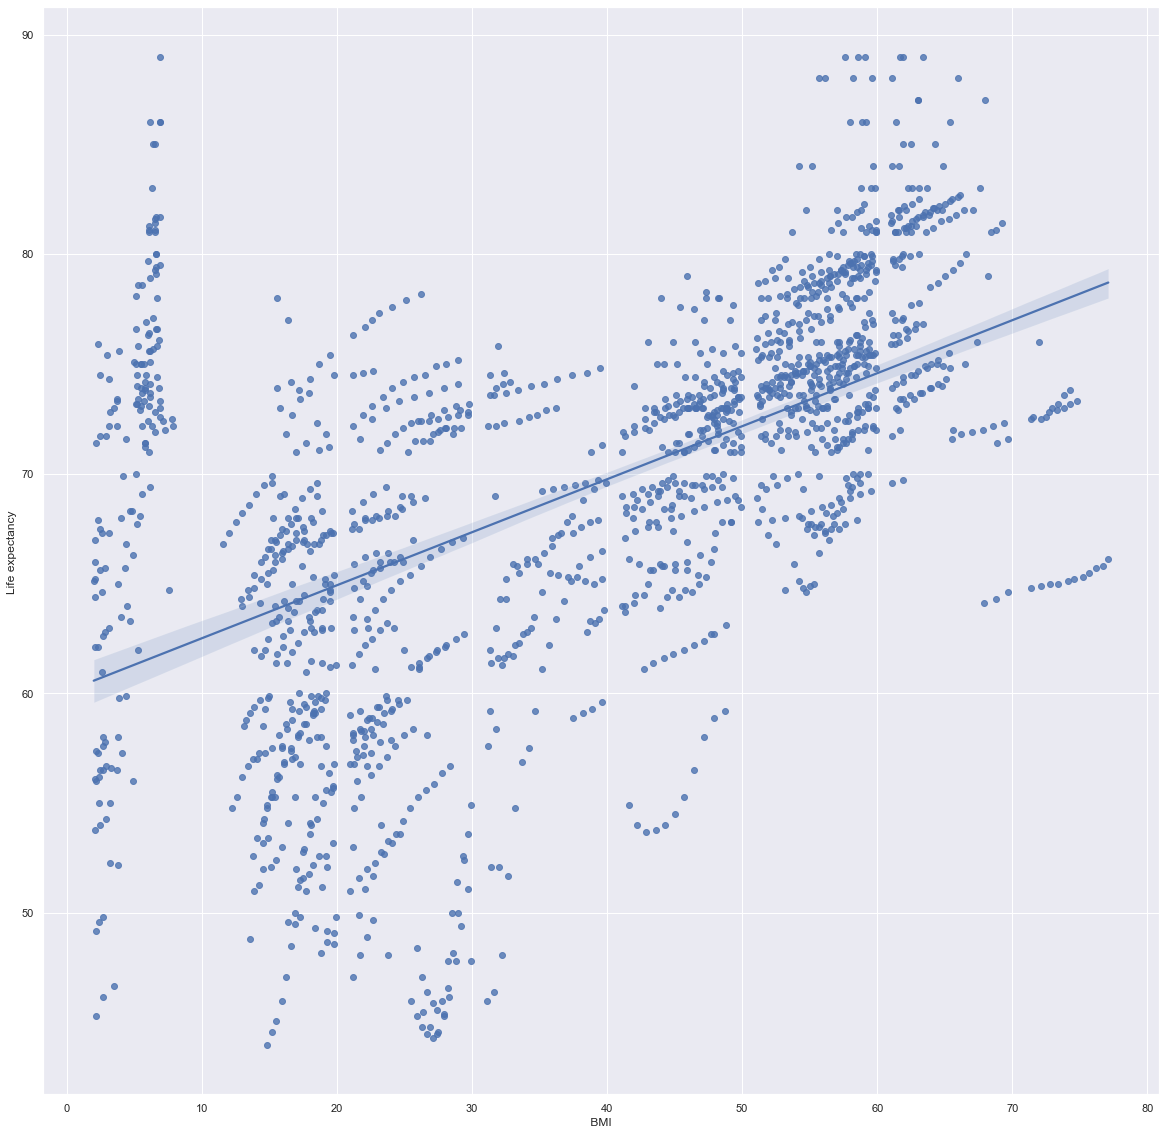

In [33]:
sns.regplot(x = " BMI ", y = "Life expectancy ",data = data)

<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy '>

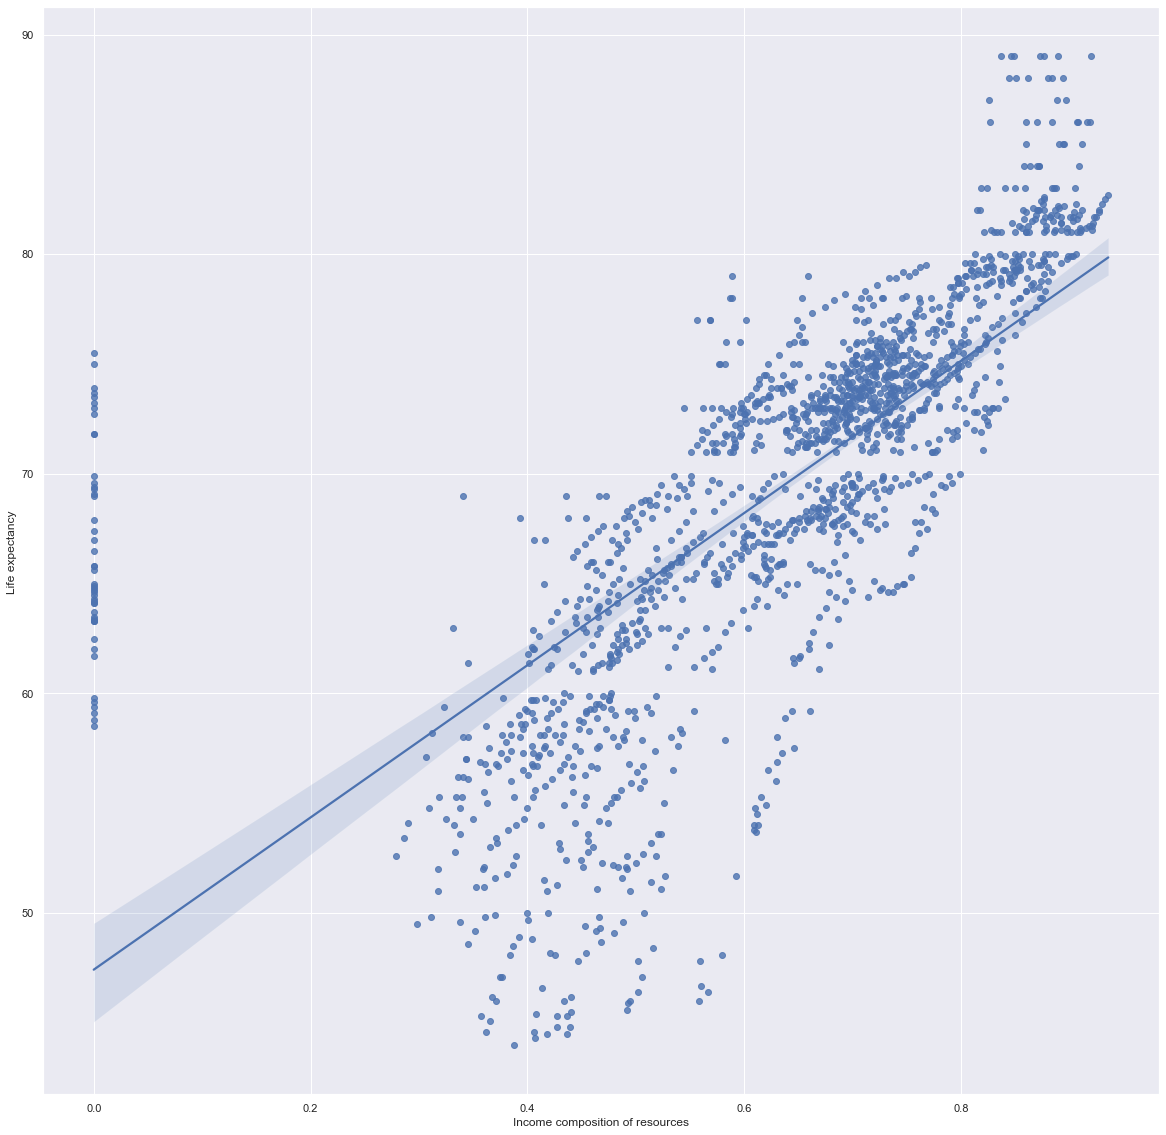

In [34]:
sns.regplot(x = "Income composition of resources", y = "Life expectancy ",data = data)

<AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy '>

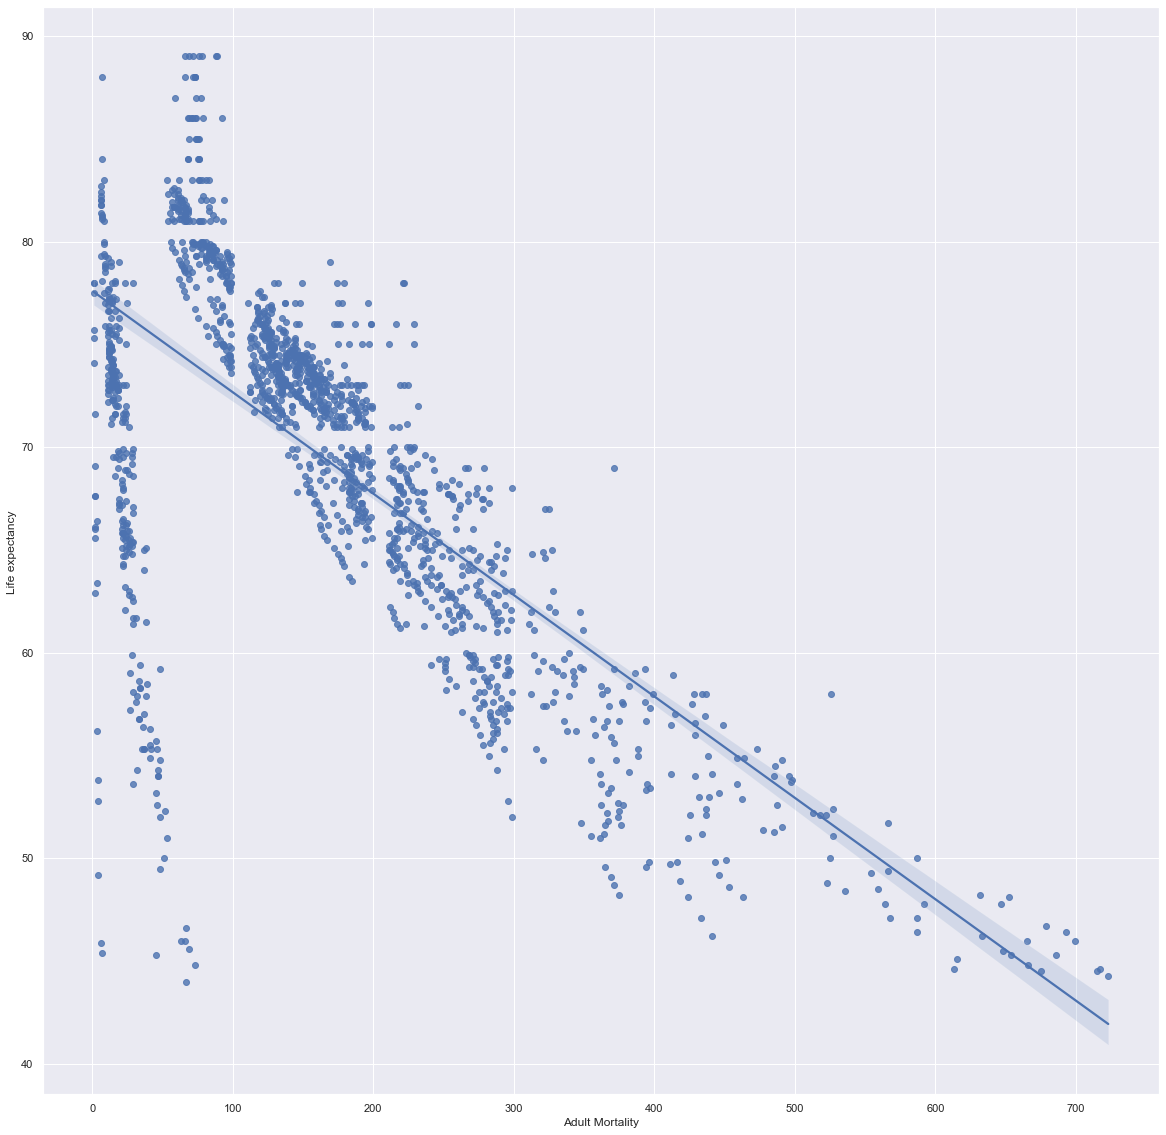

In [35]:
sns.regplot(x = "Adult Mortality", y = "Life expectancy ",data = data)

<h3>Plotting Actual vs Predicted</h3>

<AxesSubplot:xlabel='Life expectancy '>

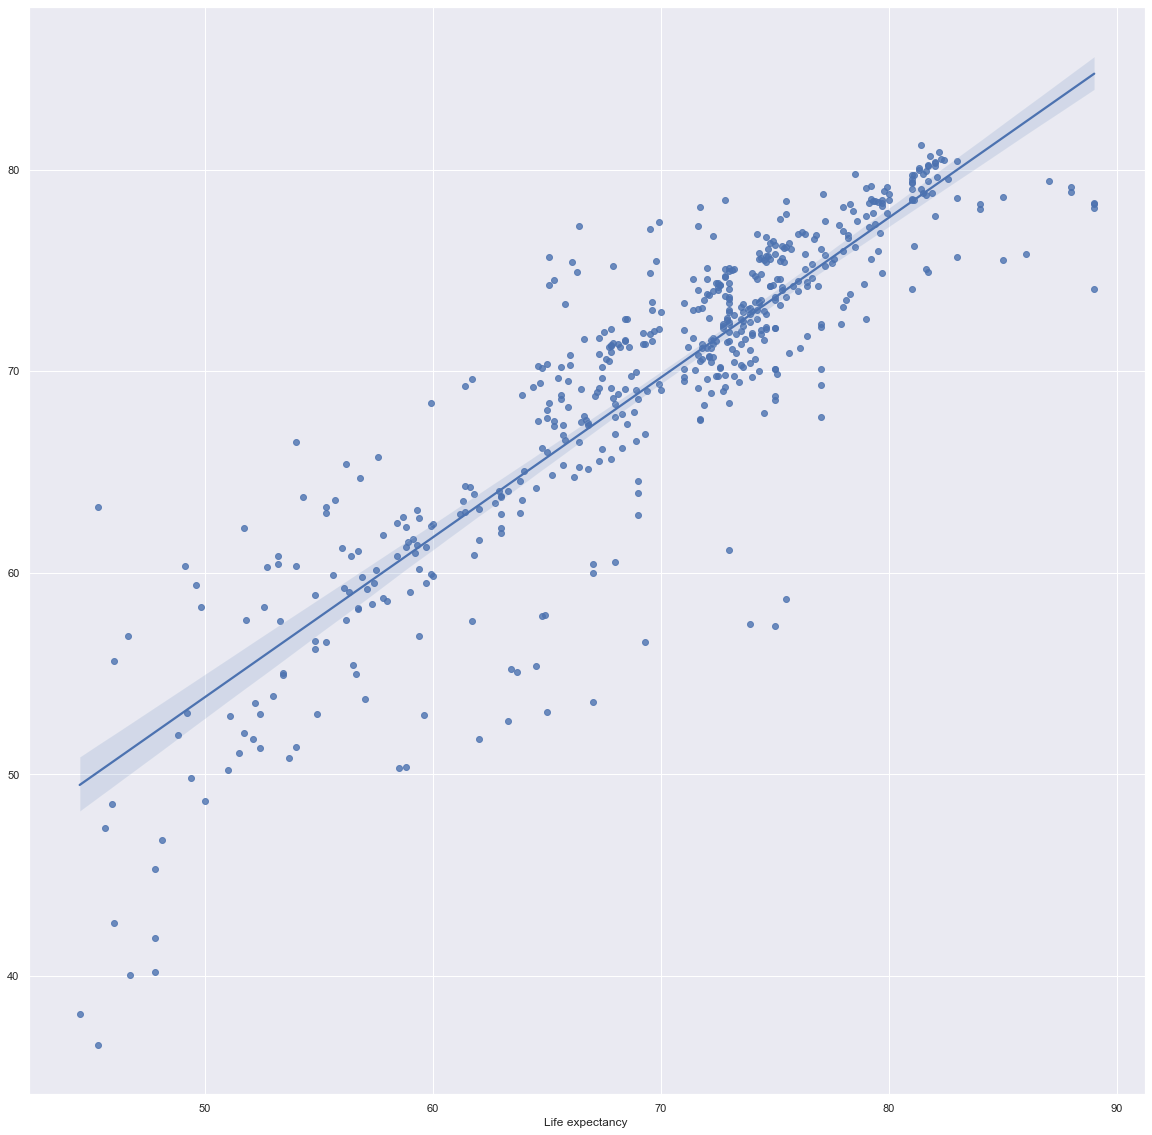

In [37]:
sns.regplot(y_test,y = model.predict(x_test))

In [36]:
model.predict(x_test)

array([62.42993353, 68.21779523, 72.14809443, 79.21120918, 78.09952214,
       72.93049662, 52.93701073, 72.11528132, 72.15918935, 69.13682535,
       79.729367  , 68.83751772, 75.09411268, 74.5563393 , 75.458938  ,
       55.43912357, 70.92658589, 76.11952813, 77.1937705 , 77.23183944,
       71.50169006, 69.62397086, 78.4080137 , 73.43327217, 74.90014154,
       63.02544548, 45.32728212, 75.44124778, 61.24814004, 77.57175843,
       76.07243699, 76.66247181, 75.434484  , 79.52076655, 59.9710985 ,
       79.91123278, 60.45618716, 73.69610854, 69.66339423, 75.70212387,
       74.692339  , 69.74575633, 80.38092695, 74.04698309, 54.97549776,
       70.07931051, 68.99810899, 63.78412535, 77.82650129, 71.57869936,
       77.77660346, 40.19703728, 72.65566793, 71.1438407 , 59.22623607,
       78.47578457, 66.59520052, 78.4331571 , 70.47829398, 41.88178247,
       79.01414747, 52.97335575, 78.88981951, 76.94070856, 75.79951668,
       66.20716208, 73.01572797, 69.98133406, 65.12980496, 65.97